# SDSS Activity: Color-Magnitude Diagrams


# 2. Import SciServer libraries 
The SciServer team has written a number of libraries, generally prefixed by <tt>SciServer</tt>, that assist in various functions. As with all Python libraries, they must be actively imported before being used.

The next code block imports those, together with some standard Python libraries helpful for scientific analysis. The code block below applies some settings you may find helpful.

In [2]:
# Step 2a: Import Python libraries to work with SciServer

import SciServer.CasJobs as CasJobs # query with CasJobs, the primary database for the SDSS
#import SciServer.SciDrive           # read/write to/from SciDrive, cloud-based storage for your work
import numpy as np                  # standard Python lib for math ops
import pandas                       # data manipulation package
import matplotlib.pyplot as plt     # another graphing package
print('All libraries imported')

# ensures columns get written completely in notebook
pandas.set_option('display.max_colwidth', -1)
# do *not* show python warnings 
import warnings
warnings.filterwarnings('ignore')
print('Settings applied')

All libraries imported
Settings applied


In [5]:
# Step 3: Enter query
query="""
SELECT TOP 200 p.objId,p.ra,p.dec,p.g,p.r,p.i,p.z
  FROM star AS p
   JOIN SpecObj AS s ON s.bestobjid = p.objid
WHERE p.u BETWEEN 0 AND 19.0
  AND p.g BETWEEN 0 AND 19.0
  
"""
# send query to CasJobs
stars = CasJobs.executeQuery(query, "dr14")
stars = stars.set_index('objId')
stars

,ra,dec,g,r,i,z
objId,,,,,,
1237645941291614227,49.627485,-1.041769,16.17133,15.58940,15.37850,15.26744
1237645942898229350,40.582032,0.134770,16.44336,15.52452,15.18185,14.98858
1237645942905569371,57.281615,0.018768,14.92993,14.56054,14.53054,14.19394
1237645942905700356,57.512104,0.084887,17.63091,17.09078,16.84627,16.71464
1237645942905700448,57.605375,0.027275,15.95427,14.95673,14.59481,14.36269
1237645942905831442,57.824999,0.215609,17.32501,17.17070,17.08611,17.03252
1237645942905831562,57.943458,0.059678,15.38486,14.69913,14.44319,14.33092
1237645942906028070,58.304024,0.013814,17.24661,16.77493,16.59758,16.50323
1237645942906028116,58.395736,0.209766,15.36086,14.49837,14.39811,13.78940


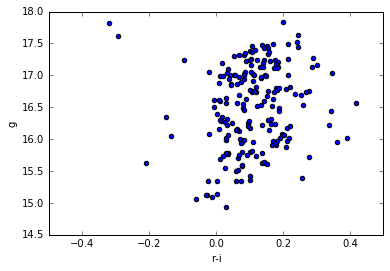

In [6]:
color1 = stars['r']-stars['i']
magnitude = stars['g']

plt.scatter(color1, magnitude)
plt.xlabel('r-i')
plt.ylabel('g')
plt.axis([-0.5, 0.5, 14.5, 18.])
plt.show() 

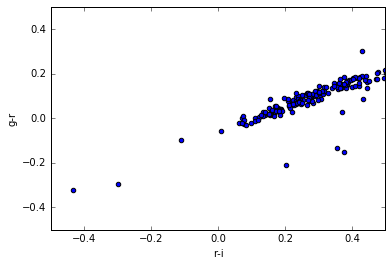

In [8]:
color2 = stars['g']-stars['r']

plt.scatter(color2, color1)
plt.xlabel('r-i')
plt.ylabel('g-r')
plt.axis([-0.5, 0.5, -0.5, 0.5])
plt.show() 

# Let's do it for galaxies

In [10]:
# Step 3: Enter query
query="""
SELECT TOP 200 p.objId,p.ra,p.dec,p.g,p.r,p.i,p.z,s.z as redshift
  FROM galaxy AS p
   JOIN SpecObj AS s ON s.bestobjid = p.objid
WHERE p.r < 17.7
  AND s.z BETWEEN 0.03 AND 0.05
  
"""
# send query to CasJobs
galaxies = CasJobs.executeQuery(query, "dr14")
galaxies

,objId,ra,dec,g,r,i,z,redshift
0,1237648705662877841,210.926593,0.994378,17.60783,16.82095,16.41976,16.10774,0.042968
1,1237648705662943350,211.015446,0.896525,15.88819,15.34549,15.03006,14.82670,0.043023
2,1237648705663140008,211.604589,0.892880,17.53715,17.10311,16.79754,16.63133,0.047645
3,1237648705663205474,211.715772,0.850122,15.61455,14.70752,14.24628,13.88253,0.047586
4,1237648705663205475,211.713583,0.849498,16.71623,16.11392,15.84075,15.66176,0.048751
5,1237648705663205476,211.711033,0.851788,17.73288,17.01965,16.66289,16.42256,0.046121
6,1237648705663271089,211.773090,0.856396,18.28393,17.30157,16.80203,16.39499,0.048691
7,1237648705663271099,211.782507,0.851035,18.17735,17.34889,16.93357,16.57971,0.048145
8,1237648705664909449,215.513208,0.862068,16.60741,16.17405,15.96379,15.81239,0.035954
9,1237648705665368137,216.554093,0.860581,15.35378,14.79559,14.50731,14.33247,0.031821


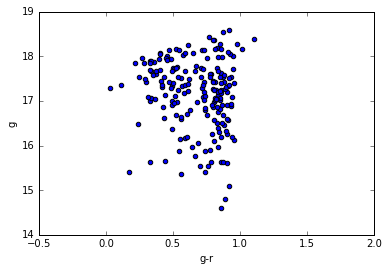

In [11]:
color1 = galaxies['r']-galaxies['i']
color2 = galaxies['g']-galaxies['r']
magnitude = galaxies['g']

plt.scatter(color2, magnitude)
plt.xlabel('g-r')
plt.ylabel('g')
plt.axis([-0.5, 2., 14, 19.])
plt.show() 